In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("dataset -P543.xlsx")

In [2]:
#(number_of_rows, number_of_columns)
df.shape

(1440, 3)

In [3]:
#columns
print(df.columns)


Index(['title', 'rating', 'body'], dtype='object')


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [5]:
# Display first few rows
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [6]:
#(Descriptive stats):Helps understand range, central tendency, and spread
df.describe()


,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
# Check for missing values
print("🔎 Missing values per column:")
print(df.isnull().sum())

# Check for duplicate entries
print("\n📌 Number of duplicate rows:")
print(df.duplicated().sum())

🔎 Missing values per column:
title     0
rating    0
body      0
dtype: int64

📌 Number of duplicate rows:
0


In [8]:
# Create sentiment labels from ratings
def assign_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

# Apply the function
df['sentiment'] = df['rating'].apply(assign_sentiment)

# View sample
df[['rating', 'sentiment']].head(10)

,rating,sentiment
0,1,Negative
1,3,Neutral
2,4,Positive
3,1,Negative
4,1,Negative
5,1,Negative
6,1,Negative
7,1,Negative
8,1,Negative
9,1,Negative


In [9]:
# Count the number of each sentiment category
sentiment_counts = df['sentiment'].value_counts()
total_reviews = sentiment_counts.sum()

# Display the counts and percentages
print("🔢 Sentiment Distribution (Counts & Percentages):")
for sentiment in ['Positive', 'Neutral', 'Negative']:
    count = sentiment_counts.get(sentiment, 0)
    percent = (count / total_reviews) * 100 if total_reviews > 0 else 0
    print(f"{sentiment} reviews: {count} ({percent:.2f}%)")

🔢 Sentiment Distribution (Counts & Percentages):
Positive reviews: 729 (50.62%)
Neutral reviews: 199 (13.82%)
Negative reviews: 512 (35.56%)


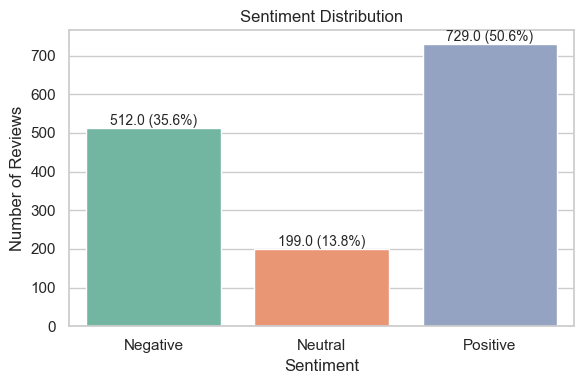

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count data for annotations
sentiment_counts = df['sentiment'].value_counts()
total = sentiment_counts.sum()

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df,
    x='sentiment',
    order=['Negative', 'Neutral', 'Positive'],
    palette='Set2',
    hue='sentiment',
    legend=False
)

# Annotate bars with count and %
for p in ax.patches:
    height = p.get_height()
    label = f"{height} ({(height/total)*100:.1f}%)"
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10)

# Titles and labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [11]:
pip install wordcloud


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /Users/rushankpotadar/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


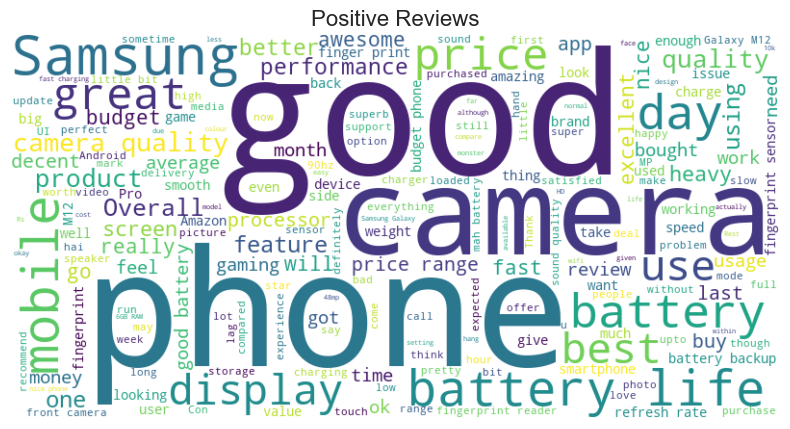

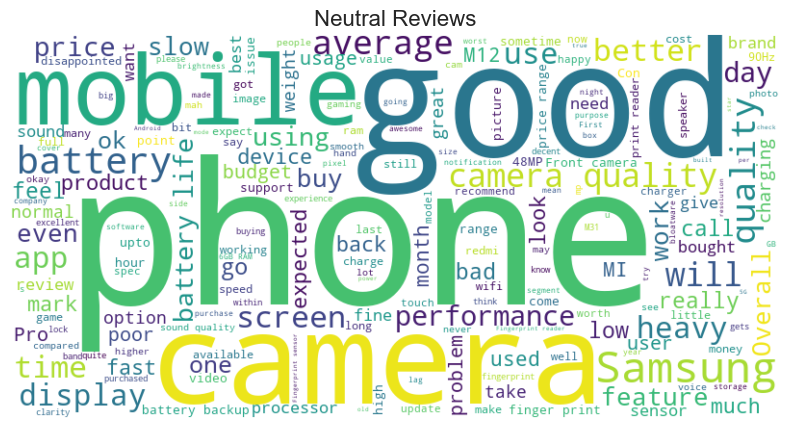

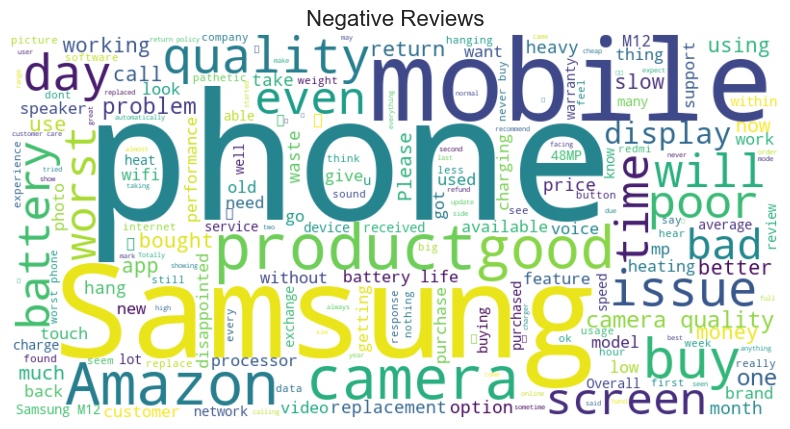

In [12]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Word Clouds for each sentiment
generate_wordcloud(df[df['sentiment'] == 'Positive']['body'], 'Positive Reviews')
generate_wordcloud(df[df['sentiment'] == 'Neutral']['body'], 'Neutral Reviews')
generate_wordcloud(df[df['sentiment'] == 'Negative']['body'], 'Negative Reviews')

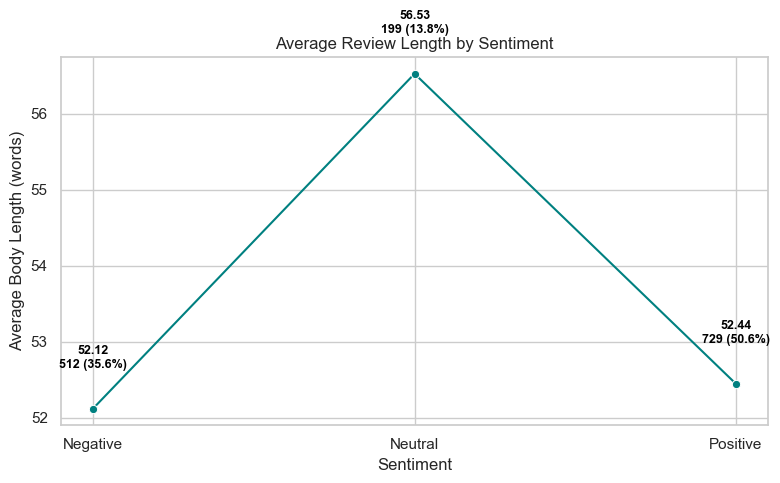

In [13]:
# Advanced EDA Ideas for title and body Columns
#Review Length Analysis




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure body_length column exists
df['body_length'] = df['body'].apply(lambda x: len(str(x).split()))

# Total number of reviews
total_reviews = len(df)

# Group by sentiment: average body length and review counts
sentiment_stats = df.groupby('sentiment').agg(
    body_length=('body_length', 'mean'),
    review_count=('body', 'count')
).reset_index()

# Calculate percentage
sentiment_stats['percentage'] = sentiment_stats['review_count'] / total_reviews * 100

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=sentiment_stats, x='sentiment', y='body_length', marker='o', color='teal')

# Annotate each point with count and percentage
for i, row in sentiment_stats.iterrows():
    annotation = f"{row['body_length']:.2f}\n{row['review_count']} ({row['percentage']:.1f}%)"
    plt.text(row['sentiment'], row['body_length'] + 0.5, annotation,
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# Labels and title
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Body Length (words)')
plt.tight_layout()
plt.show()


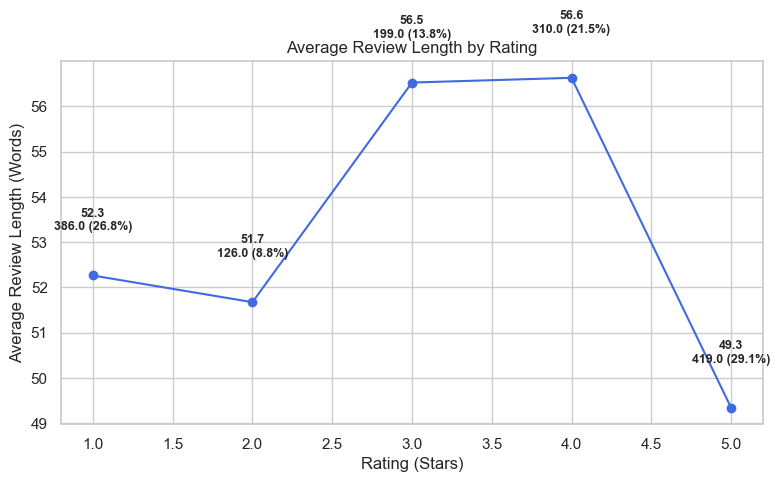

In [14]:
# 4. Correlation Between Ratings and Length
# Simplified Chart: Average Review Length by Rating


import matplotlib.pyplot as plt
import pandas as pd

# Total reviews
total_reviews = len(df)

# Group data to get average length, count, and percentage per rating
avg_length_per_rating = df.groupby('rating').agg(
    body_length=('body_length', 'mean'),
    review_count=('body', 'count')
).reset_index()

avg_length_per_rating['percentage'] = (avg_length_per_rating['review_count'] / total_reviews) * 100

# Plot
plt.figure(figsize=(8, 5))
plt.plot(avg_length_per_rating['rating'], avg_length_per_rating['body_length'], marker='o', color='royalblue')

# Add annotations: average length, count, and %
for i, row in avg_length_per_rating.iterrows():
    annotation = f"{row['body_length']:.1f}\n{row['review_count']} ({row['percentage']:.1f}%)"
    plt.text(row['rating'], row['body_length'] + 1, annotation, ha='center', fontsize=9, fontweight='bold')

# Final touches
plt.title('Average Review Length by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Average Review Length (Words)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
print(df.columns)


Index(['title', 'rating', 'body', 'sentiment', 'body_length'], dtype='object')


In [16]:
# Create cleaned_body column by converting body text to lowercase
df['cleaned_body'] = df['body'].astype(str).str.lower()


In [17]:
#  3. N-gram Analysis

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(sentiment, n=2, top_k=10):
    texts = df[df['sentiment'] == sentiment]['cleaned_body']
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

# Example: Get top 10 unigrams (n=2) for 'Negative' sentiment
print(get_top_ngrams('Negative', n=3, top_k=10))



[('camera quality poor', np.int64(21)), ('battery life good', np.int64(11)), ('don buy phone', np.int64(10)), ('don buy product', np.int64(7)), ('samsung galaxy m12', np.int64(7)), ('don waste money', np.int64(6)), ('camera quality good', np.int64(6)), ('phone don buy', np.int64(6)), ('6000 mah battery', np.int64(5)), ('samsung service centre', np.int64(5))]



📱 Samsung-related Reviews:
    rating sentiment                                               body
0        1  Negative  Very disappointed with the overall performance...
5        1  Negative  I will never purchase Samsung phones. Phone is...
6        1  Negative  This is worst samsung mobile I have seen from ...
11       1  Negative  No 5Ghz wifi band on this mobile, miserable in...
13       1  Negative  very poor build qualityvery poor camera piclow...

📊 Samsung Review Sentiment Counts:
Negative: 201 reviews
Positive: 193 reviews
Neutral: 61 reviews

⭐ Average Samsung Review Rating: 2.91


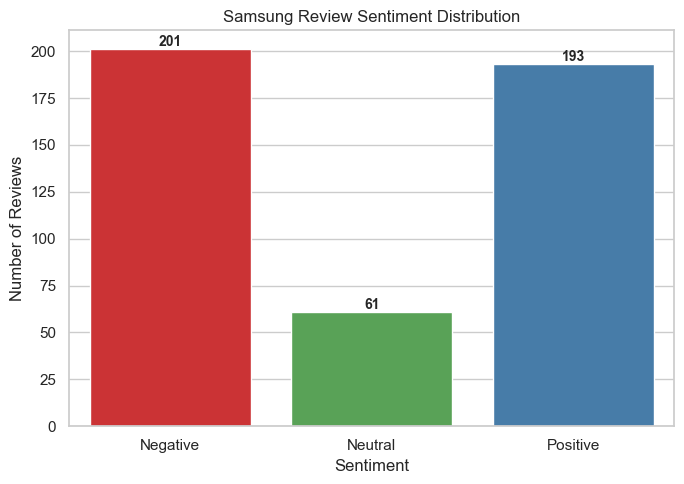

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Samsung-related reviews
samsung_df = df[df['body'].str.contains('samsung', case=False, na=False)][['rating', 'sentiment', 'body']]
# View samples
print("\n📱 Samsung-related Reviews:")
print(samsung_df.head())

# Count by sentiment
samsung_sentiment_counts = samsung_df['sentiment'].value_counts()
total_samsung_reviews = samsung_sentiment_counts.sum()

print("\n📊 Samsung Review Sentiment Counts:")
for sentiment, count in samsung_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_samsung = samsung_df['rating'].mean()
print("\n⭐ Average Samsung Review Rating:", round(avg_rating_samsung, 2))

#  Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=samsung_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='Set1', hue='sentiment', legend=False)

# Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Samsung Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()



📱 Realme-related Reviews:
     rating sentiment                                               body
64        2  Negative  Genuine feedback after 1 week of usageGood thi...
74        5  Positive  I'm writing this review after using few days I...
81        1  Negative  Dear friends, believe me. Don't waste your mon...
129       1  Negative  I bought Samsung to get less bloated OS but Sa...
142       5  Positive  Too good too purchase.PROS:1. CAMERA fantastic...

📊 Realme Review Sentiment Counts:
Negative: 10 reviews
Positive: 4 reviews
Neutral: 4 reviews

⭐ Average Realme Review Rating: 2.5


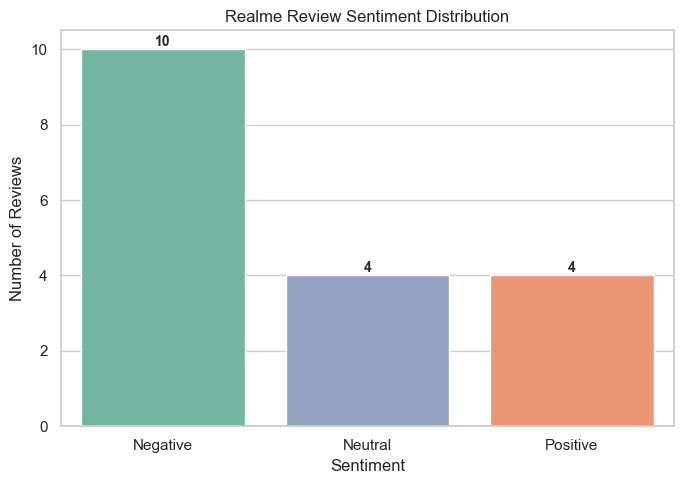

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Realme-related reviews
realme_df = df[df['body'].str.contains('realme', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Realme-related Reviews:")
print(realme_df.head())

# 📊 Count by sentiment
realme_sentiment_counts = realme_df['sentiment'].value_counts()
total_realme_reviews = realme_sentiment_counts.sum()

print("\n📊 Realme Review Sentiment Counts:")
for sentiment, count in realme_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_realme = realme_df['rating'].mean()
print("\n⭐ Average Realme Review Rating:", round(avg_rating_realme, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=realme_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='Set2', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Realme Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()



📱 Vivo-related Reviews:
     rating sentiment                                               body
57        2  Negative  The price of the product is OK as per the pric...
213       3   Neutral  This phone does it job, but don't fall for 90H...
222       5  Positive  I bought this phone to last 5years(thus OPPO o...
235       4  Positive  I baught this phone but after 2-3days use i fi...
245       4  Positive  Positive point :-1) battery life is massive 🤟2...

📊 Vivo Review Sentiment Counts:
Negative: 5 reviews
Neutral: 4 reviews
Positive: 3 reviews

⭐ Average Vivo Review Rating: 2.75


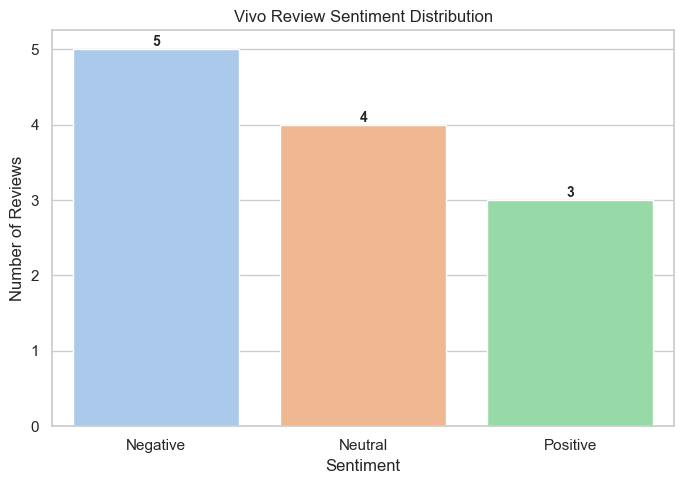

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Vivo-related reviews
vivo_df = df[df['body'].str.contains('vivo', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Vivo-related Reviews:")
print(vivo_df.head())

# 📊 Count by sentiment
vivo_sentiment_counts = vivo_df['sentiment'].value_counts()
total_vivo_reviews = vivo_sentiment_counts.sum()

print("\n📊 Vivo Review Sentiment Counts:")
for sentiment, count in vivo_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_vivo = vivo_df['rating'].mean()
print("\n⭐ Average Vivo Review Rating:", round(avg_rating_vivo, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=vivo_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='pastel', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Vivo Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


📱 Oppo-related Reviews:
     rating sentiment                                               body
64        2  Negative  Genuine feedback after 1 week of usageGood thi...
142       5  Positive  Too good too purchase.PROS:1. CAMERA fantastic...
204       1  Negative  Dear all. I am writing this review very honest...
213       3   Neutral  This phone does it job, but don't fall for 90H...
222       5  Positive  I bought this phone to last 5years(thus OPPO o...

📊 Oppo Review Sentiment Counts:
Negative: 7 reviews
Positive: 4 reviews
Neutral: 3 reviews

⭐ Average Oppo Review Rating: 2.64


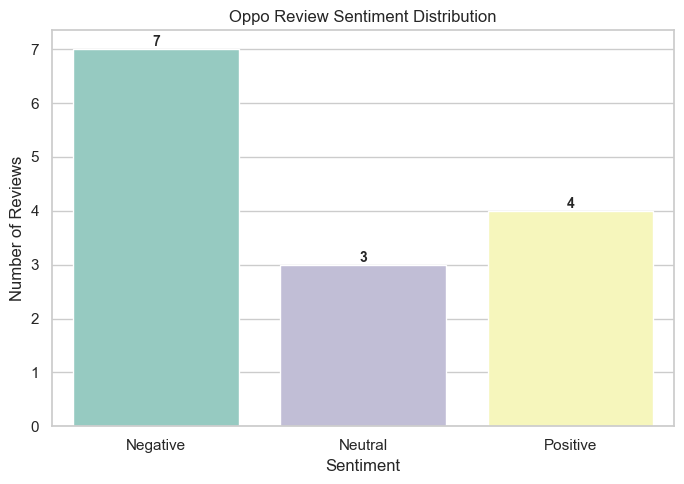

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Oppo-related reviews
oppo_df = df[df['body'].str.contains('oppo', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Oppo-related Reviews:")
print(oppo_df.head())

# 📊 Count by sentiment
oppo_sentiment_counts = oppo_df['sentiment'].value_counts()
total_oppo_reviews = oppo_sentiment_counts.sum()

print("\n📊 Oppo Review Sentiment Counts:")
for sentiment, count in oppo_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_oppo = oppo_df['rating'].mean()
print("\n⭐ Average Oppo Review Rating:", round(avg_rating_oppo, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=oppo_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='Set3', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Oppo Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()



📱 iPhone-related Reviews:
     rating sentiment                                               body
72        4  Positive  Amazon did a great job with the delivery of th...
95        4  Positive  No need to underestimate exynos 850, with 90Hz...
125       5  Positive  Much better than expectations and that too a b...
307       4  Positive  Face recognition is slow. otherwise the phone ...
424       4  Positive  Using it from last 8 months, worth it totally ...

📊 iPhone Review Sentiment Counts:
Positive: 6 reviews

⭐ Average iPhone Review Rating: 4.33


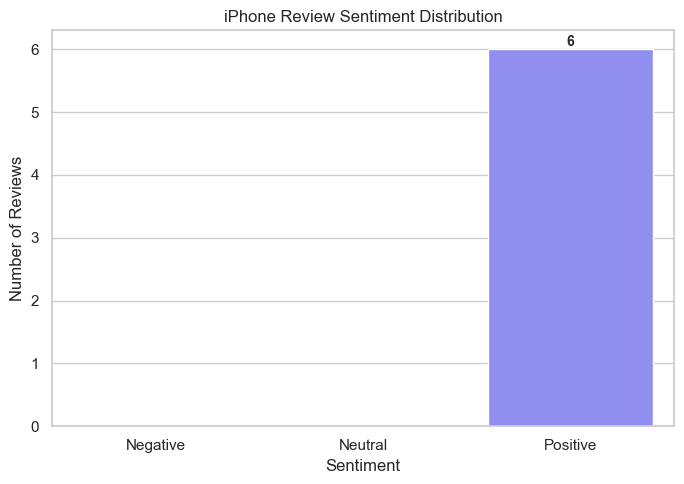

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter iPhone-related reviews (fix regex warning using non-capturing group)
iphone_df = df[df['body'].str.contains(r'\b(?:iphone|apple iphone)\b', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 iPhone-related Reviews:")
print(iphone_df.head())

# 📊 Count by sentiment
iphone_sentiment_counts = iphone_df['sentiment'].value_counts()
total_iphone_reviews = iphone_sentiment_counts.sum()

print("\n📊 iPhone Review Sentiment Counts:")
for sentiment, count in iphone_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_iphone = iphone_df['rating'].mean()
print("\n⭐ Average iPhone Review Rating:", round(avg_rating_iphone, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=iphone_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='cool', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("iPhone Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()



📱 Other Brands-related Reviews:
   rating sentiment                                               body
1       3   Neutral                              Camera quality is low
2       4  Positive  Got the mobile on the launch date,Battery must...
3       1  Negative  1. It doesn't work with 5.0GHz WiFi frequency....
4       1  Negative  Not worth buying....faulty software, poor disp...
7       1  Negative  मोबाइल का कैमरा बिल्कुल भी सही नही है 48 PM बत...

📊 Other Brand Review Sentiment Counts:
Positive: 531 reviews
Negative: 302 reviews
Neutral: 135 reviews

⭐ Average Other Brand Review Rating: 3.31


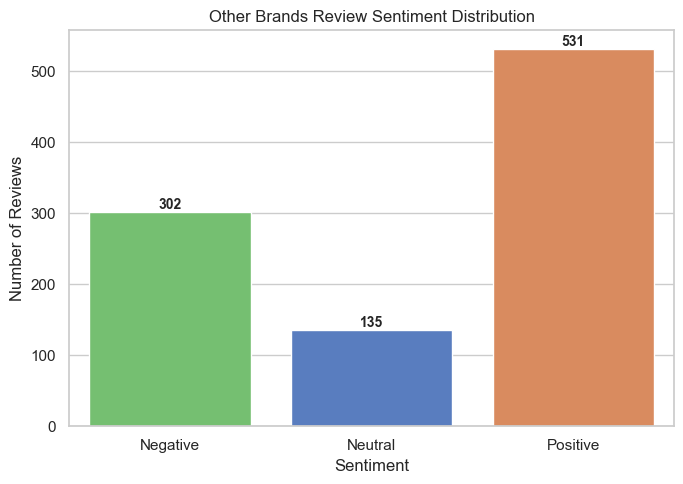

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🧹 Filter reviews that do NOT mention samsung, realme, vivo, oppo, iphone, or apple iphone
exclude_keywords = ['samsung', 'realme', 'vivo', 'oppo', 'iphone', 'apple iphone']

# Create a mask that excludes all the mentioned brands
mask = ~df['body'].str.contains('|'.join(exclude_keywords), case=False, na=False)
other_df = df[mask][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Other Brands-related Reviews:")
print(other_df.head())

# 📊 Count by sentiment
other_sentiment_counts = other_df['sentiment'].value_counts()
total_other_reviews = other_sentiment_counts.sum()

print("\n📊 Other Brand Review Sentiment Counts:")
for sentiment, count in other_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_other = other_df['rating'].mean()
print("\n⭐ Average Other Brand Review Rating:", round(avg_rating_other, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=other_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='muted', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Other Brands Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [24]:
#Model Building/Evaluation

 Accuracy: 0.77

 Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.84      0.84       111
     Neutral       1.00      0.09      0.17        44
    Positive       0.72      0.94      0.82       133

    accuracy                           0.77       288
   macro avg       0.85      0.62      0.61       288
weighted avg       0.81      0.77      0.73       288



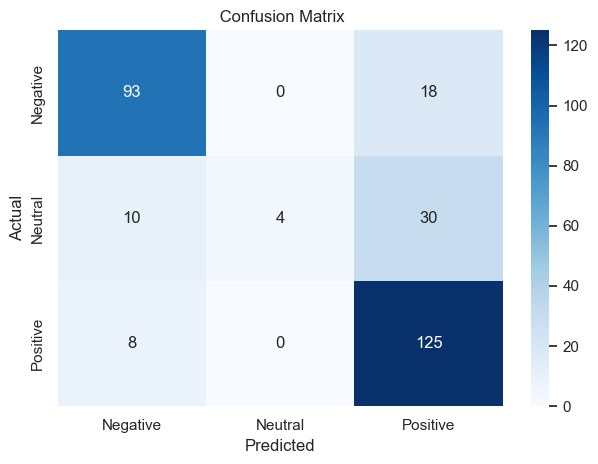

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic cleaning
df['cleaned_body'] = df['body'].astype(str).str.lower()

# New features from EDA
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Basic brand flag (optional)
import numpy as np
brands = ['samsung', 'iphone', 'realme', 'vivo', 'oppo']
df['brand'] = np.select(
    [df['body'].str.contains(b, case=False, na=False) for b in brands],
    brands,
    default='other'
)

# Features & Target
X = df[['cleaned_body', 'review_length', 'title_length', 'brand']]
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types
text_feature = 'cleaned_body'
num_features = ['review_length', 'title_length']
cat_features = ['brand']

# Column transformer
preprocessor = ColumnTransformer([
    ('text', TfidfVectorizer(max_features=3000, stop_words='english'), text_feature),
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# After fitting on your training data:
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(" Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.tight_layout()
plt.show()


In [26]:
import joblib
joblib.dump(pipeline['classifier'], 'LogisticRegression.pkl')
print("model saved as 'Logistic_Regression_model.pkl'")

model saved as 'Logistic_Regression_model.pkl'
